## Import packages

In [1]:
import pandas as pd
import sys
print(sys.version)
print("Pandas version: ", pd.__version__)
import skbio
print("Scikir-bio version: ", skbio.__version__)
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib version: ", matplotlib.__version__)
import seaborn as sns
print("Seaborn version: ", sns.__version__)
import numpy as np
print("Numpy version: ", np.__version__)
import statannotations
import scipy
print("Scipy version: ", scipy.__version__)
print("Statannotations version: ", statannotations.__version__)
import sklearn
print("Sklearn version: ", sklearn.__version__)

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) 
[GCC 9.4.0]
Pandas version:  1.3.5
Scikir-bio version:  0.5.7
Matplotlib version:  3.2.2
Seaborn version:  0.11.2
Numpy version:  1.21.6
Scipy version:  1.7.3
Statannotations version:  0.6.0
Sklearn version:  1.0.2


## Import Original OTU data

In [2]:
otu_table = pd.read_table("Table_otu.raw.txt.xls")
#change the order of the columns
columns_order = ['#OTU ID', 'S1.1st', 'S1.2nd', 'S1.3rd', 'S2.1st', 'S2.2nd', 'S2.3rd',
       'S3.1st', 'S3.2nd', 'S3.3rd', 'E1.1st', 'E1.2nd', 'E1.3rd', 'E2.1st',
       'E2.2nd', 'E2.3rd', 'E3.1st', 'E3.2nd', 'E3.3rd', 'E4.1st', 'E4.2nd', 'E4.3rd', 'E5.1st', 'E5.2nd',
       'E5.3rd', 'taxonomy']
otu_table = otu_table[columns_order]
otu_table

,#OTU ID,S1.1st,S1.2nd,S1.3rd,S2.1st,S2.2nd,S2.3rd,S3.1st,S3.2nd,S3.3rd,...,E3.1st,E3.2nd,E3.3rd,E4.1st,E4.2nd,E4.3rd,E5.1st,E5.2nd,E5.3rd,taxonomy
0,OTU_3,29304,28896,27479,4197,4822,4277,13509,16061,21637,...,5229,15919,11114,1120,694,211,806,873,860,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
1,OTU_17,4847,5024,4782,17,16,18,90,83,57,...,4,1,1,0,1,0,0,0,0,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
2,OTU_5,251,363,360,92,92,72,11412,11232,5698,...,1278,2169,4400,1307,383,148,239,245,303,"k:Bacteria,p:Firmicutes,c:Clostridia,o:Clostri..."
3,OTU_61,168,181,195,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,"k:Bacteria,p:Firmicutes,c:Bacilli,o:Paenibacil..."
4,OTU_33,52,78,88,2,11,1,0,0,2,...,106,0,1,1,4,39,1,7,0,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,OTU_2050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,"k:Bacteria,p:Firmicutes,c:Clostridia,o:Peptost..."
590,OTU_165,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,"k:Bacteria,p:Bacteroidota,c:Bacteroidia,o:Bact..."
591,OTU_1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
592,OTU_151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,"k:Bacteria,p:Bacteroidota,c:Bacteroidia,o:Bact..."


## OTU table process

### OTU table rarefaction

`axis = 0`, do across the rows, from top to bottom

`axis = 1`, do across the columns，from left to right

In [3]:
#get rarefaction depth
sample_cols = [col for col in otu_table.columns if col not in ['#OTU ID', 'taxonomy']] #get all the sample columns
rarefaction_depth = min(otu_table[col].sum(axis=0) for col in sample_cols) #get the minimum sum of all the samples
rarefaction_depth #25252

25252

In [4]:
#rarefy the otu_table
otu_table_rarefied = otu_table.copy(deep=True)
from skbio.stats import subsample_counts
rarefy = lambda x: subsample_counts(counts = x.values, n=rarefaction_depth, replace=False)
otu_table_rarefied[sample_cols] = otu_table_rarefied[sample_cols].apply(rarefy, axis=0)

In [5]:
otu_table_rarefied

,#OTU ID,S1.1st,S1.2nd,S1.3rd,S2.1st,S2.2nd,S2.3rd,S3.1st,S3.2nd,S3.3rd,...,E3.1st,E3.2nd,E3.3rd,E4.1st,E4.2nd,E4.3rd,E5.1st,E5.2nd,E5.3rd,taxonomy
0,OTU_3,20197,19694,19681,3063,3381,3229,9602,10929,15647,...,5229,11817,8359,788,498,137,575,638,591,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
1,OTU_17,3362,3487,3442,10,9,13,60,56,38,...,4,1,1,0,1,0,0,0,0,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
2,OTU_5,168,251,254,67,63,54,8021,7647,4069,...,1278,1630,3305,883,255,108,159,181,200,"k:Bacteria,p:Firmicutes,c:Clostridia,o:Clostri..."
3,OTU_61,119,126,136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"k:Bacteria,p:Firmicutes,c:Bacilli,o:Paenibacil..."
4,OTU_33,34,55,68,1,9,1,0,0,0,...,106,0,0,1,3,28,1,7,0,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,OTU_2050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"k:Bacteria,p:Firmicutes,c:Clostridia,o:Peptost..."
590,OTU_165,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,"k:Bacteria,p:Bacteroidota,c:Bacteroidia,o:Bact..."
591,OTU_1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
592,OTU_151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"k:Bacteria,p:Bacteroidota,c:Bacteroidia,o:Bact..."


### Merge the replicates of eight samples

In [6]:
#replace the sample name. S1.1st, S1.2nd, S1.3rd --> S1
sample_otus = otu_table_rarefied[sample_cols]
sample_otus.columns = ['C' if col.split('.')[0] in ['E4','E5'] else col.split('.')[0] for col in sample_otus.columns] #split the column name by '.' and get the first part. Rename E4, E5 as Ctrl
individuals_mean = sample_otus.groupby(sample_otus.columns, axis=1).mean() #group by the column name and get the mean
#sort the columns of individuals_mean as [S1, S2, S3, E1, E2, E3, C]
individuals_mean = individuals_mean[['S1', 'S2', 'S3', 'E1', 'E2', 'E3', 'C']]
individuals_mean


,S1,S2,S3,E1,E2,E3,C
0,19857.333333,3224.333333,12059.333333,14349.000000,7166.666667,8468.333333,537.833333
1,3430.333333,10.666667,51.333333,2.000000,1.000000,2.000000,0.166667
2,224.333333,61.333333,6579.000000,2471.333333,5600.000000,2071.000000,297.666667
3,127.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
4,52.333333,3.666667,0.000000,0.000000,1.000000,35.333333,6.666667
...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667


In [7]:
#concat the #OTU_ID and taxonomy columns to individuals_mean
otu_table_rarefied_merged = pd.concat([otu_table_rarefied['#OTU ID'], individuals_mean, otu_table_rarefied['taxonomy']], axis=1)

In [8]:
otu_table_rarefied_merged

,#OTU ID,S1,S2,S3,E1,E2,E3,C,taxonomy
0,OTU_3,19857.333333,3224.333333,12059.333333,14349.000000,7166.666667,8468.333333,537.833333,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
1,OTU_17,3430.333333,10.666667,51.333333,2.000000,1.000000,2.000000,0.166667,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
2,OTU_5,224.333333,61.333333,6579.000000,2471.333333,5600.000000,2071.000000,297.666667,"k:Bacteria,p:Firmicutes,c:Clostridia,o:Clostri..."
3,OTU_61,127.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,"k:Bacteria,p:Firmicutes,c:Bacilli,o:Paenibacil..."
4,OTU_33,52.333333,3.666667,0.000000,0.000000,1.000000,35.333333,6.666667,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
...,...,...,...,...,...,...,...,...,...
589,OTU_2050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,"k:Bacteria,p:Firmicutes,c:Clostridia,o:Peptost..."
590,OTU_165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,"k:Bacteria,p:Bacteroidota,c:Bacteroidia,o:Bact..."
591,OTU_1187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,"k:Bacteria,p:Proteobacteria,c:Gammaproteobacte..."
592,OTU_151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,"k:Bacteria,p:Bacteroidota,c:Bacteroidia,o:Bact..."


### Rarefacted otu table for diversity analysis

In [9]:
otu_table_samples = otu_table_rarefied.copy(deep=True)
#set "#OTU ID" as new index
otu_table_samples.set_index("#OTU ID", inplace=True)
#remove taxonomy column
otu_table_samples.drop(columns="taxonomy", inplace=True)
#transpose the otu_table_sampels to have samples as rows and OTUs as columns
otu_table_samples = otu_table_samples.T
rarefied_otu_table_samples = otu_table_samples

In [10]:
rarefied_otu_table_samples

#OTU ID,OTU_3,OTU_17,OTU_5,OTU_61,OTU_33,OTU_78,OTU_578,OTU_75,OTU_4382,OTU_27,...,OTU_120,OTU_144,OTU_2746,OTU_1184,OTU_1217,OTU_2050,OTU_165,OTU_1187,OTU_151,OTU_183
S1.1st,20197,3362,168,119,34,60,1,301,2,138,...,0,0,0,0,0,0,0,0,0,0
S1.2nd,19694,3487,251,126,55,55,13,450,0,212,...,0,0,0,0,0,0,0,0,0,0
S1.3rd,19681,3442,254,136,68,62,17,439,2,224,...,0,0,0,0,0,0,0,0,0,0
S2.1st,3063,10,67,0,1,0,1,24,0,1191,...,0,0,0,0,0,0,0,0,0,0
S2.2nd,3381,9,63,0,9,0,0,20,0,1287,...,0,0,0,0,0,0,0,0,0,0
S2.3rd,3229,13,54,0,1,0,0,16,0,1155,...,0,0,0,0,0,0,0,0,0,0
S3.1st,9602,60,8021,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
S3.2nd,10929,56,7647,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S3.3rd,15647,38,4069,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
E1.1st,19556,2,3118,0,0,0,0,0,0,27,...,0,0,0,0,0,0,0,0,0,0


## Species Relative Abundance

You can get species relative abundance from phylum level to species level if you specify the `Query_taxonomy_level` in the `RelativeAbundance` function.

The genus relative abundace data was performed here.

Query_taxonomy_level = ['k', 'p', 'c', 'o', 'f', 'g', 's']

In [11]:
from SpeciesAbundance import RelativeAbundance
genus_relative_abundance = RelativeAbundance(
    OTU_table_full_taxonomy=otu_table_rarefied_merged, 
    Query_taxonomy_level='g')
genus_relative_abundance

g,1174-901-12,Acetobacter,Acidovorax,Acinetobacter,Actinobacillus,Actinomyces,Actinomycetospora,Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium,Altererythrobacter,Amnibacterium,...,Thermoactinomyces,Trueperella,Turicibacter,Tyzzerella,Veillonella,Verticiella,Virgibacillus,Weissella,Xanthomonas,unclassified
S1,0.000000,0.000013,0.000119,0.002244,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004937,0.000000,0.000000,0.000106,0.000026,0.000304,0.000092,0.001650
S2,0.000000,0.000000,0.000000,0.000330,0.000779,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000158,0.000000,0.000290,0.000000,0.000026,0.449641,0.000000,0.000686
S3,0.000000,0.000013,0.000000,0.000000,0.000013,0.000000,0.0,0.000013,0.000000,0.000000,...,0.000000,0.000000,0.021846,0.000000,0.000000,0.000000,0.000026,0.000673,0.000000,0.000924
E1,0.000000,0.000013,0.000000,0.000145,0.000013,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000013,0.000000,0.009372,0.000647,0.000000,0.000000,0.000026,0.000449,0.000000,0.001729
E2,0.000000,0.000013,0.000000,0.000172,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013636,0.000066,0.000000,0.000000,0.000066,0.000211,0.000000,0.000766
E3,0.000198,0.000000,0.000000,0.001637,0.000290,0.000013,0.0,0.000290,0.000000,0.000053,...,0.000000,0.000013,0.001386,0.000000,0.000000,0.000000,0.000066,0.007696,0.000000,0.002270
C,0.000007,0.000000,0.000000,0.000330,0.000007,0.000013,0.0,0.000000,0.000007,0.000000,...,0.000007,0.000000,0.000238,0.000000,0.000013,0.000000,0.000046,0.000442,0.000007,0.000099


## Diversity

### Alpha diversity

In [12]:
from skbio.diversity import alpha_diversity

#Chao1
chao1_diversity = alpha_diversity("chao1", rarefied_otu_table_samples.values, ids=otu_table_samples.index)

#Shannon
shannon_diversity = alpha_diversity("shannon", rarefied_otu_table_samples.values, ids=otu_table_samples.index)

In [13]:
# goods_coverage
def goods_coverage(sample_counts):
    singletons = (sample_counts == 1).sum() #number of singletons
    total_count = sample_counts.sum() #total number of individuals
    return 1 - singletons / total_count

goods_coverage_values = rarefied_otu_table_samples.apply(goods_coverage, axis=1)

In [14]:
# samples grouped
group_one = {
    'S1.1st': 'Init', 'S1.2nd': 'Init', 'S1.3rd': 'Init',
    'S2.1st': 'Init', 'S2.2nd': 'Init', 'S2.3rd': 'Init',
    'S3.1st': 'Init', 'S3.2nd': 'Init', 'S3.3rd': 'Init',
    'E1.1st': 'End', 'E1.2nd': 'End', 'E1.3rd': 'End',
    'E2.1st': 'End', 'E2.2nd': 'End', 'E2.3rd': 'End',
    'E3.1st': 'End', 'E3.2nd': 'End', 'E3.3rd': 'End',
    'E4.1st': 'C', 'E4.2nd': 'C', 'E4.3rd': 'C',
    'E5.1st': 'C', 'E5.2nd': 'C', 'E5.3rd': 'C'
}

### Beta Diversity

#### Prepare the biom format otu table and phylogenic tree for unifrac analysis

In [15]:
#export otu_table_rarefied as otu_table_samples_rearranged.tsv
otu_table_rarefied.to_csv("otu_table_samples_rearranged.tsv", sep="\t", index=False)
#export otu_table_rarefied_merged as otu_table_individuals_rearranged_merged.tsv
otu_table_rarefied_merged.to_csv("otu_table_individuals_rearranged_merged.tsv", sep="\t", index=False)

In [16]:
import subprocess
import os

#remove otus_aligned.fasta & otus_fasttree.tre
#subprocess.run(["rm", "otus_aligned.fasta"])
#subprocess.run(["rm", "otus_fasttree.tre"])
#subprocess.run(["sleep", "3"])

#create otus_aligned.fasta
if not os.path.exists("otus_aligned.fasta"):
    result = subprocess.run(["mafft", "otus.fa"],
                        stdout=subprocess.PIPE,
                        text=True)
    with open("otus_aligned.fasta", "w") as f:
        f.write(result.stdout)
    
#create otus_fasttree.tre
if not os.path.exists("otus_fasttree.tre"):
    phylogenic_tree = subprocess.run(["fasttree", "-nt"],
                                     input=result.stdout,
                                     stdout=subprocess.PIPE,
                                     text=True)
    with open("otus_fasttree.tre", "w") as f:
        f.write(phylogenic_tree.stdout)

In [17]:
#create BIOM-Format 2.1 file
command1 = ["biom", "convert", "-i", "otu_table_samples_rearranged.tsv", "-o", "otu_table_samples.biom", "--table-type", "OTU table", "--to-hdf5"]
subprocess.run(command1)

CompletedProcess(args=['biom', 'convert', '-i', 'otu_table_samples_rearranged.tsv', '-o', 'otu_table_samples.biom', '--table-type', 'OTU table', '--to-hdf5'], returncode=0)

In [18]:
command2 = ["biom", "convert", "-i", "otu_table_individuals_rearranged_merged.tsv", "-o", "otu_table_individuals.biom", "--table-type", "OTU table", "--to-hdf5"]
subprocess.run(command2)

CompletedProcess(args=['biom', 'convert', '-i', 'otu_table_individuals_rearranged_merged.tsv', '-o', 'otu_table_individuals.biom', '--table-type', 'OTU table', '--to-hdf5'], returncode=0)

In [19]:
subprocess.run("biom summarize-table -i otu_table_samples.biom".split(" "))

Num samples: 24
Num observations: 594
Total count: 606,048
Table density (fraction of non-zero values): 0.156

Counts/sample summary:
 Min: 25,252.000
 Max: 25,252.000
 Median: 25,252.000
 Mean: 25,252.000
 Std. dev.: 0.000
 Sample Metadata Categories: None provided
 Observation Metadata Categories: taxonomy

Counts/sample detail:
S1.1st: 25,252.000
S1.2nd: 25,252.000
S1.3rd: 25,252.000
S2.1st: 25,252.000
S2.2nd: 25,252.000
S2.3rd: 25,252.000
S3.1st: 25,252.000
S3.2nd: 25,252.000
S3.3rd: 25,252.000
E1.1st: 25,252.000
E1.2nd: 25,252.000
E1.3rd: 25,252.000
E2.1st: 25,252.000
E2.2nd: 25,252.000
E2.3rd: 25,252.000
E3.1st: 25,252.000
E3.2nd: 25,252.000
E3.3rd: 25,252.000
E4.1st: 25,252.000
E4.2nd: 25,252.000
E4.3rd: 25,252.000
E5.1st: 25,252.000
E5.2nd: 25,252.000
E5.3rd: 25,252.000


CompletedProcess(args=['biom', 'summarize-table', '-i', 'otu_table_samples.biom'], returncode=0)

In [20]:
subprocess.run("biom summarize-table -i otu_table_individuals.biom".split(" "))

Num samples: 7
Num observations: 594
Total count: 176,764
Table density (fraction of non-zero values): 0.312

Counts/sample summary:
 Min: 25,252.000
 Max: 25,252.000
 Median: 25,252.000
 Mean: 25,252.000
 Std. dev.: 0.000
 Sample Metadata Categories: None provided
 Observation Metadata Categories: taxonomy

Counts/sample detail:
S2: 25,252.000
S1: 25,252.000
E1: 25,252.000
E2: 25,252.000
E3: 25,252.000
S3: 25,252.000
C: 25,252.000


CompletedProcess(args=['biom', 'summarize-table', '-i', 'otu_table_individuals.biom'], returncode=0)

#### Distance Matrix for PCoA, ANOSIM & ADONIS

In [21]:
from BetaDiversity import CustomDistanceMatrix
dm = CustomDistanceMatrix(rarefied_otu_table_samples)
dm.index

Index(['S1.1st', 'S1.2nd', 'S1.3rd', 'S2.1st', 'S2.2nd', 'S2.3rd', 'S3.1st',
       'S3.2nd', 'S3.3rd', 'E1.1st', 'E1.2nd', 'E1.3rd', 'E2.1st', 'E2.2nd',
       'E2.3rd', 'E3.1st', 'E3.2nd', 'E3.3rd', 'E4.1st', 'E4.2nd', 'E4.3rd',
       'E5.1st', 'E5.2nd', 'E5.3rd'],
      dtype='object')

In [22]:
#Bray-Curtis
bray_curtis_dm = dm.EasyDistanceMatrix(metric="braycurtis")
#Euclidean
euclidean_dm = dm.EasyDistanceMatrix(metric='euclidean')
#Weighted Unifrac
weighted_unifrac_dm = dm.UnifracDistanceMatrix(metric="weighted unifrac", 
                                              biom_format_data="otu_table_samples.biom", 
                                              phylogenic_tree="otus_fasttree.tre",
                                              threads_num=4)

In [23]:
print(bray_curtis_dm)

24x24 distance matrix
IDs:
'S1.1st', 'S1.2nd', 'S1.3rd', 'S2.1st', 'S2.2nd', 'S2.3rd', 'S3.1st', 'S3.2nd', ...
Data:
[[0.         0.02970062 0.03065104 0.86337716 0.8511009  0.85696182
  0.60304134 0.55096626 0.36420878 0.20952796 0.38899889 0.65159195
  0.62046571 0.6488199  0.84032948 0.77966102 0.51865199 0.64980992
  0.95944876 0.971329   0.98701093 0.96903216 0.96570569 0.96824014]
 [0.02970062 0.         0.01013781 0.85977348 0.84694282 0.85312054
  0.59508158 0.54268969 0.35648661 0.20236021 0.38191034 0.64735466
  0.61357516 0.64153334 0.83260732 0.77510692 0.5143355  0.64240456
  0.95513227 0.96697291 0.98657532 0.96855695 0.96499287 0.96677491]
 [0.03065104 0.01013781 0.         0.85822905 0.84555679 0.85153651
  0.59310154 0.54086805 0.35450657 0.20148899 0.38088072 0.64735466
  0.61246634 0.64058292 0.8315777  0.77447331 0.5144147  0.64196895
  0.95406304 0.96606209 0.98665452 0.96871535 0.96503247 0.96677491]
 [0.86337716 0.85977348 0.85822905 0.         0.03425471 0.03623

#### PCoA Analysis

In [24]:
from BetaDiversity import CustomPCOA

#Bray-Curtis
bray_curtis_pcoa = CustomPCOA(bray_curtis_dm).PCOA()

#Euclidean
euclidean_pcoa = CustomPCOA(euclidean_dm).PCOA()

#Weighted Unifrac
weighted_unifrac_pcoa = CustomPCOA(weighted_unifrac_dm).PCOA()

/home/yuhangwu/miniconda3/envs/analysis_16s/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.07590370044227455 and the largest is 3.0203934561922394.
  RuntimeWarning
/home/yuhangwu/miniconda3/envs/analysis_16s/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes 

#### ANOSIM & ADONIS

In [25]:
group_labels = np.array(list(group_one.values()))
group_labels

array(['Init', 'Init', 'Init', 'Init', 'Init', 'Init', 'Init', 'Init',
       'Init', 'End', 'End', 'End', 'End', 'End', 'End', 'End', 'End',
       'End', 'C', 'C', 'C', 'C', 'C', 'C'], dtype='<U4')

In [26]:
from skbio.stats.distance import anosim
#Bray-Curtis
bray_curtis_anosim = anosim(bray_curtis_dm, grouping=group_labels)
#Euclidean
euclidean_anosim = anosim(euclidean_dm, grouping=group_labels)
#Weighted Unifrac
weighted_unifrac_anosim = anosim(weighted_unifrac_dm, grouping=group_labels)

In [27]:
print("Bray Curtis Anosim\n", bray_curtis_anosim)

Bray Curtis Anosim
 method name                ANOSIM
test statistic name             R
sample size                    24
number of groups                3
test statistic            0.61777
p-value                     0.001
number of permutations        999
Name: ANOSIM results, dtype: object


In [28]:
from skbio.stats.distance import permanova #adonis
#Bray-Curtis
bray_curtis_permanova = permanova(bray_curtis_dm, grouping=group_labels, permutations=999)
#Euclidean
euclidean_permanova = permanova(euclidean_dm, grouping=group_labels, permutations=999)
#Weighted Unifrac
weighted_unifrac_permanova = permanova(weighted_unifrac_dm, grouping=group_labels, permutations=999)

#### Distance Matrix for clusterheatmap

In [29]:
otu_table_clustermap = otu_table_rarefied_merged.copy(deep=True)
#set "#OTU ID" as new index
otu_table_clustermap.set_index("#OTU ID", inplace=True)
#remove taxonomy column
otu_table_clustermap.drop(columns="taxonomy", inplace=True)
#transpose the otu_table_clustermap to have samples as rows and OTUs as columns
otu_table_clustermap = otu_table_clustermap.T
otu_table_clustermap


#OTU ID,OTU_3,OTU_17,OTU_5,OTU_61,OTU_33,OTU_78,OTU_578,OTU_75,OTU_4382,OTU_27,...,OTU_120,OTU_144,OTU_2746,OTU_1184,OTU_1217,OTU_2050,OTU_165,OTU_1187,OTU_151,OTU_183
S1,19857.333333,3430.333333,224.333333,127.000000,52.333333,59.0,10.333333,396.666667,1.333333,191.333333,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
S2,3224.333333,10.666667,61.333333,0.000000,3.666667,0.0,0.333333,20.000000,0.000000,1211.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
S3,12059.333333,51.333333,6579.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.333333,0.666667,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
E1,14349.000000,2.000000,2471.333333,0.000000,0.000000,0.0,0.000000,0.333333,0.333333,15.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
E2,7166.666667,1.000000,5600.000000,0.333333,1.000000,0.0,0.000000,0.000000,0.333333,0.333333,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
E3,8468.333333,2.000000,2071.000000,0.000000,35.333333,0.0,0.000000,0.333333,0.000000,86.333333,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
C,537.833333,0.166667,297.666667,0.000000,6.666667,0.0,0.000000,0.000000,0.000000,1.833333,...,0.5,0.166667,0.333333,1.5,0.333333,0.166667,0.5,0.166667,0.166667,0.166667


In [30]:
dm_clustermap = CustomDistanceMatrix(otu_table_clustermap)

In [31]:
#Bray-Curtis
bray_curtis_dm_clustermap = dm_clustermap.EasyDistanceMatrix(metric="braycurtis")
#Euclidean
euclidean_dm_clustermap = dm_clustermap.EasyDistanceMatrix(metric='euclidean')
#Weighted Unifrac
weighted_unifrac_dm_clustermap = dm_clustermap.UnifracDistanceMatrix(metric="weighted unifrac", 
                                              biom_format_data="otu_table_individuals.biom", 
                                              phylogenic_tree="otus_fasttree.tre",
                                              threads_num=4)

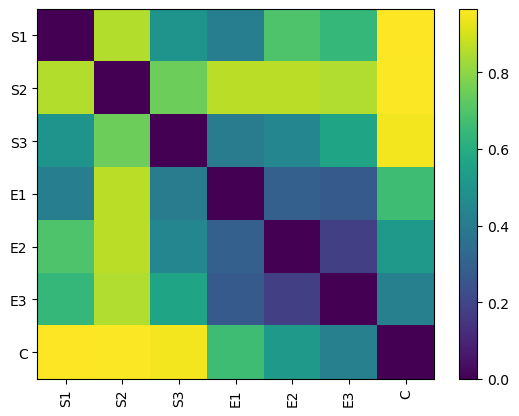

In [32]:
bray_curtis_dm_clustermap

## ARG

The data of `Four.12.12_clean` belongs to the E4 sample.

In [33]:
args = pd.read_table("rpkm.type.txt")
args.set_index("type", inplace=True)
# rename the sample name, the sample original name of Four.11.9_clean is 4.12.12
args.rename(columns={"Four.12.12_clean": "C", "One.11.9_clean": "S1", "Three.11.9_clean": "S3",	"Two.11.9_clean": "S2"}, inplace=True)
# Define the desired order of columns
new_order = ['S1', 'S2', 'S3', 'C']
# Reindex the DataFrame with the new order of columns
args = args.reindex(columns=new_order)
args

,S1,S2,S3,C
type,,,,
aminoglycoside,13.998699,40.813845,427.848663,0.460100
antibacterial_fatty_acid,0.000000,0.000000,0.030837,0.000000
bacitracin,881.378076,368.466629,622.129612,37.857643
beta_lactam,946.084175,178.494477,491.666450,9.685060
bleomycin,0.000000,0.000000,0.000000,1.636613
chloramphenicol,0.144246,0.000000,0.309809,0.000000
defensin,0.000000,1.959820,0.129043,0.000000
florfenicol,0.658512,0.000000,0.038775,0.000000
fosfomycin,59.714838,28.740637,1.689716,0.145980


In [34]:
#get top 10 args
top_10_args = args.sum(axis=1).sort_values(ascending=False)[:10].index
main_args = args.loc[top_10_args]
main_args

,S1,S2,S3,C
type,,,,
multidrug,6679.337902,1243.503972,4041.076695,128.721727
polymyxin,2416.193802,372.763219,1203.190978,71.822403
bacitracin,881.378076,368.466629,622.129612,37.857643
beta_lactam,946.084175,178.494477,491.666450,9.685060
macrolide-lincosamide-streptogramin,771.032309,306.363642,534.853604,6.703802
other_peptide_antibiotics,615.661364,109.090071,291.848493,3.762091
tetracycline,176.637065,177.164849,371.054006,54.834154
aminoglycoside,13.998699,40.813845,427.848663,0.460100
fosfomycin,59.714838,28.740637,1.689716,0.145980


In [35]:
main_args.sum(axis=1)

type
multidrug                              12092.640295
polymyxin                               4063.970403
bacitracin                              1909.831960
beta_lactam                             1625.930162
macrolide-lincosamide-streptogramin     1618.953357
other_peptide_antibiotics               1020.362019
tetracycline                             779.690075
aminoglycoside                           483.121307
fosfomycin                                90.291171
trimethoprim                              20.090039
dtype: float64

## Lefse Data prepatation

In [36]:
"""#read the example data from https://github.com/biobakery/biobakery/raw/master/test_suite/biobakery_tests/data/lefse/input/hmp_small_aerobiosis.txt
example_data = pd.read_table("hmp_aerobiosis_small.txt")
example_data.head()"""

'#read the example data from https://github.com/biobakery/biobakery/raw/master/test_suite/biobakery_tests/data/lefse/input/hmp_small_aerobiosis.txt\nexample_data = pd.read_table("hmp_aerobiosis_small.txt")\nexample_data.head()'

In [37]:
"""def parse_taxonomy(taxonomy_str):
    taxonomy_levels = ['k', 'p', 'c', 'o', 'f', 'g', 's'] 
    #taxonomy_dict = {level: level+'_unclassified' for level in taxonomy_levels}
    taxonomy_dict = {}
    items = taxonomy_str.split(',')
    for item in items:
        key, value = item.split(':')
        #if key.strip() in taxonomy_dict:
        parsed_taxonomy = (key.strip() + '_' + value.strip())
        taxonomy_dict[key.strip()] = parsed_taxonomy
    #input: k:Bacteria,p:Firmicutes,c:Clostridia,o:Clostridiales,f:Lachnospiraceae,g:Blautia,s:
    #return k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__
    taxonomy_parsed = '|'.join([f"{value}" for key, value in taxonomy_dict.items()])
    return taxonomy_parsed """          

'def parse_taxonomy(taxonomy_str):\n    taxonomy_levels = [\'k\', \'p\', \'c\', \'o\', \'f\', \'g\', \'s\'] \n    #taxonomy_dict = {level: level+\'_unclassified\' for level in taxonomy_levels}\n    taxonomy_dict = {}\n    items = taxonomy_str.split(\',\')\n    for item in items:\n        key, value = item.split(\':\')\n        #if key.strip() in taxonomy_dict:\n        parsed_taxonomy = (key.strip() + \'_\' + value.strip())\n        taxonomy_dict[key.strip()] = parsed_taxonomy\n    #input: k:Bacteria,p:Firmicutes,c:Clostridia,o:Clostridiales,f:Lachnospiraceae,g:Blautia,s:\n    #return k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__\n    taxonomy_parsed = \'|\'.join([f"{value}" for key, value in taxonomy_dict.items()])\n    return taxonomy_parsed '

In [38]:
"""#create a new dataframe with the same column as otu_table_lefse, value is group_one
group_lefse = {'sample_id': 'group'}
group_lefse.update({sample: [group_one[sample]] for sample in group_one.keys()})
group_lefse = pd.DataFrame(group_lefse)
group_lefse"""

"#create a new dataframe with the same column as otu_table_lefse, value is group_one\ngroup_lefse = {'sample_id': 'group'}\ngroup_lefse.update({sample: [group_one[sample]] for sample in group_one.keys()})\ngroup_lefse = pd.DataFrame(group_lefse)\ngroup_lefse"

In [39]:
"""otu_table_lefse = otu_table_rarefied.copy(deep=True)
otu_table_lefse.drop(columns="#OTU ID", inplace=True)
otu_table_lefse['taxonomy'] = otu_table_rarefied['taxonomy'].apply(parse_taxonomy)
#move taxonomy at first column
cols = otu_table_lefse.columns.tolist()
cols = cols[-1:] + cols[:-1]
otu_table_lefse = otu_table_lefse[cols]
#renmae taxonomy to sampleid
otu_table_lefse.rename(columns={"taxonomy": "sample_id"}, inplace=True)
#convert otu reads to abundance
sample_columns = [col for col in otu_table_lefse.columns if col not in ['sample_id']]
otu_table_lefse[sample_columns] = otu_table_lefse[sample_columns].apply(lambda x: x / x.sum(), axis=0)
otu_table_lefse"""

'otu_table_lefse = otu_table_rarefied.copy(deep=True)\notu_table_lefse.drop(columns="#OTU ID", inplace=True)\notu_table_lefse[\'taxonomy\'] = otu_table_rarefied[\'taxonomy\'].apply(parse_taxonomy)\n#move taxonomy at first column\ncols = otu_table_lefse.columns.tolist()\ncols = cols[-1:] + cols[:-1]\notu_table_lefse = otu_table_lefse[cols]\n#renmae taxonomy to sampleid\notu_table_lefse.rename(columns={"taxonomy": "sample_id"}, inplace=True)\n#convert otu reads to abundance\nsample_columns = [col for col in otu_table_lefse.columns if col not in [\'sample_id\']]\notu_table_lefse[sample_columns] = otu_table_lefse[sample_columns].apply(lambda x: x / x.sum(), axis=0)\notu_table_lefse'

In [40]:
"""lefse_input = pd.concat([group_lefse, otu_table_lefse], axis=0)
lefse_input.to_csv("lefse_input.txt", sep="\t", index=False)
lefse_input"""

'lefse_input = pd.concat([group_lefse, otu_table_lefse], axis=0)\nlefse_input.to_csv("lefse_input.txt", sep="\t", index=False)\nlefse_input'

In [41]:
"""#lefse analysis
!lefse_format_input.py lefse_input.txt lefse_input.in -c 2 -u 1 -o 1000000
!lefse_run.py lefse_input.in lefse_output.res
!lefse_plot_res.py lefse_output.res lefse_output.png"""


'#lefse analysis\n!lefse_format_input.py lefse_input.txt lefse_input.in -c 2 -u 1 -o 1000000\n!lefse_run.py lefse_input.in lefse_output.res\n!lefse_plot_res.py lefse_output.res lefse_output.png'

## Visualization

### Manuscript

#### Stacked Relative Abundance


In [42]:
#把每个sample内丰度超过1%的otus收集起来
over_one_percent_otus = set()
for sample in genus_relative_abundance.index:
    over_one_percent_otus.update(genus_relative_abundance.loc[sample][genus_relative_abundance.loc[sample] > 0.01].index)
genus_relative_abundance_over_one_percent = genus_relative_abundance.copy(deep=True)
genus_relative_abundance_over_one_percent['Others'] = 0
for otu in genus_relative_abundance.columns:
    if otu not in over_one_percent_otus:
        genus_relative_abundance_over_one_percent['Others'] += genus_relative_abundance_over_one_percent[otu]
        genus_relative_abundance_over_one_percent.drop(columns=otu, inplace=True)
genus_relative_abundance_over_one_percent = genus_relative_abundance_over_one_percent[['Others'] + list(over_one_percent_otus)]
#sort the order of the columns
sorted_columns = ['Others', 'Turicibacter', 'Enterococcus', 'Streptococcus', 'Leuconostoc', 'Escherichia-Shigella',
                  'Weissella', 'Lactobacillus', 'Lactococcus', 'Klebsiella', 'Clostridium_sensu_stricto_1', 'Terrisporobacter']
genus_relative_abundance_over_one_percent = genus_relative_abundance_over_one_percent[sorted_columns]
genus_relative_abundance_over_one_percent

g,Others,Turicibacter,Enterococcus,Streptococcus,Leuconostoc,Escherichia-Shigella,Weissella,Lactobacillus,Lactococcus,Klebsiella,Clostridium_sensu_stricto_1,Terrisporobacter
S1,0.018744,0.004937,0.029093,0.002574,0.000000,0.789324,0.000304,0.001003,0.000040,0.142444,0.009253,0.002284
S2,0.007181,0.000158,0.052286,0.117799,0.001426,0.128531,0.449641,0.112612,0.059692,0.068179,0.002455,0.000040
S3,0.004171,0.021846,0.000040,0.124914,0.093286,0.478497,0.000673,0.001412,0.000317,0.002455,0.261022,0.011365
E1,0.004237,0.009372,0.000634,0.296399,0.002640,0.569935,0.000449,0.000739,0.000053,0.000145,0.099292,0.016104
E2,0.002297,0.013636,0.000026,0.438130,0.023259,0.284664,0.000211,0.000713,0.000026,0.000092,0.222200,0.014745
E3,0.008541,0.001386,0.003604,0.546399,0.005082,0.337016,0.007696,0.001016,0.000172,0.000449,0.082357,0.006283
C,0.001445,0.000238,0.000086,0.957640,0.004673,0.021569,0.000442,0.001650,0.000026,0.000053,0.012072,0.000106


#### Shannon Diversity

In [43]:
#create shannon diversity dataframe with group information
alpha_group = pd.DataFrame({'Shannon Diversity': shannon_diversity, 'Group': pd.Series(group_one)})
#group shannon diversity by group
grouped_data = alpha_group.groupby('Group')['Shannon Diversity'].apply(list)
#perform kruskal & mannwhitneyu test
from scipy.stats import kruskal, mannwhitneyu
kruskal_data = kruskal(*grouped_data)
pairwise_tests = {}
from itertools import combinations
for (g1, data1), (g2, data2) in combinations(grouped_data.items(), 2):
    stat, p_value_mw = mannwhitneyu(data1, data2, alternative='two-sided')
    pairwise_tests[(g1, g2)] = p_value_mw
pairwise_tests

{('C', 'End'): 0.0003996003996003996,
 ('C', 'Init'): 0.0003996003996003996,
 ('End', 'Init'): 0.18532630419857943}

In [44]:
"""
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04
"""
def Convert_P_val(p_val):
    if p_val > 0.05:
        return "ns"
    elif p_val > 0.01:
        return "*"
    elif p_val > 0.001:
        return "**"
    elif p_val > 0.0001:
        return "***"
    else:
        return "****"
stat_annotations = {key: Convert_P_val(value) for key, value in pairwise_tests.items()}
stat_annotations

{('C', 'End'): '***', ('C', 'Init'): '***', ('End', 'Init'): 'ns'}

In [45]:
#one column plot: 8.5 cm width, <=24 cm height
#1.5 column plot: 11.4 cm width, <=24 cm height
#two column plot: 17.4 cm width, <=24 cm height

#fig = plt.figure(figsize=(8.5*cm, 12*cm))

# slice fig to 1 row and 2 columns
alpha_group.groupby('Group').max()
#get the maximum shannon diversity of each group
max_shannon_diversity = alpha_group.groupby('Group').max()['Shannon Diversity']
max_shannon_diversity

Group
C       0.839538
End     1.840868
Init    2.991528
Name: Shannon Diversity, dtype: float64

#### Plot for journal

/home/yuhangwu/miniconda3/envs/analysis_16s/lib/python3.7/site-packages/ipykernel_launcher.py:119: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


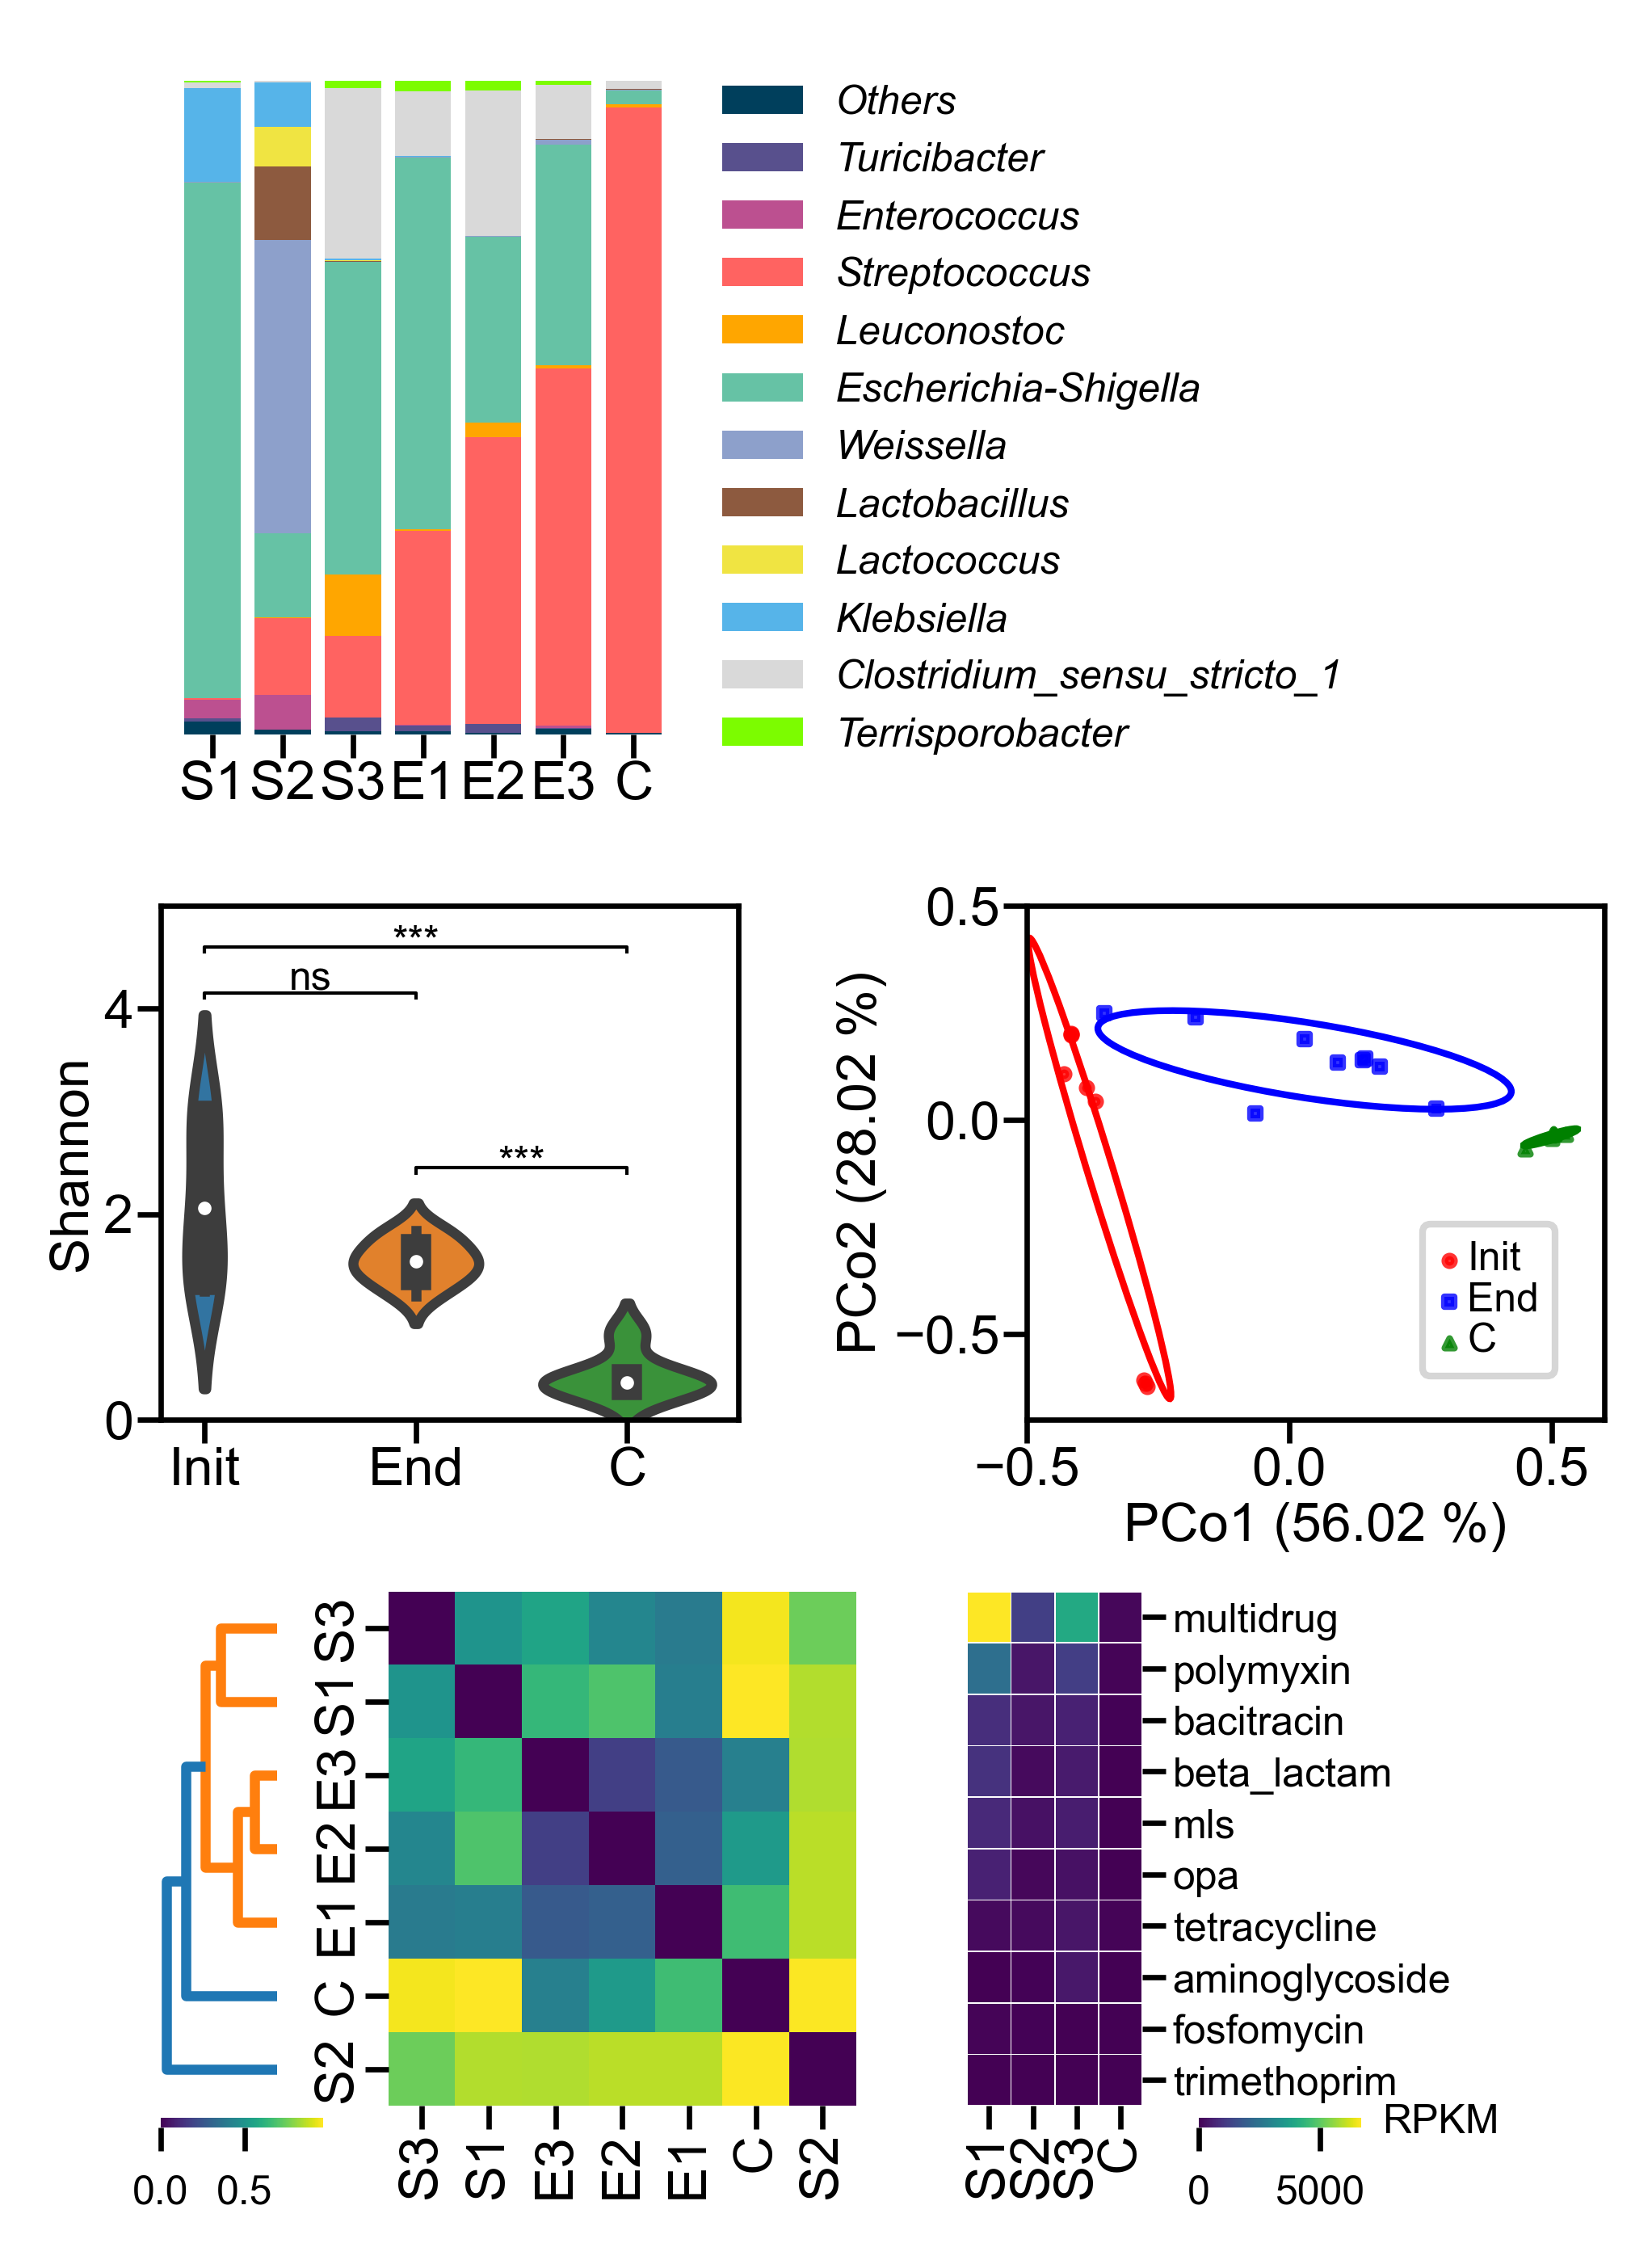

In [46]:
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] = 'Arial'

cm = 1/2.54
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8.5*cm, 14*cm), dpi=600) #constrained_layout=True, dpi=600

gs = gridspec.GridSpec(3, 1, figure=fig, height_ratios=[2,1.5,1.5], hspace=0.3) # slice fig as 3 rows, 1 columns

"""gs0: stacked relative abundance bar plot, figsize=(3*cm, 3.5*cm)"""
gs0 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], width_ratios=[1,1.5]) # slice gs[0] to 1 row, 1 column
ax0 = fig.add_subplot(gs0[0,0]) # add a subplot to gs0[0], stacked relative abundance bar plot
#specify the color map for all columns
#cmap = plt.get_cmap('tab20')
#indices = [i for i in range(11)]
#colors = [cmap(i / 20) for i in indices]
colors = [
    "#003f5c",  # 深蓝色
    "#58508d",  # 紫罗兰色
    "#bc5090",  # 深紫红色
    "#ff6361",  # 暗红色
    "#ffa600",  # 橙色
    "#66c2a5",  # 浅绿色
    "#8da0cb",  # 淡蓝色
    "#8d5a3f",  # 深棕色
    "#f0e442",  # 鲜黄色
    "#56b4e9",  # 青色
    "#d9d9d9",  # 浅灰色
    "#7CFC00"   # 草绿色
]
color_map = {otu: color for otu, color in zip(genus_relative_abundance_over_one_percent.columns, colors)}
for i, otu in enumerate(genus_relative_abundance_over_one_percent.columns):
    ax0.bar(genus_relative_abundance_over_one_percent.index, genus_relative_abundance_over_one_percent[otu], 
            bottom=genus_relative_abundance_over_one_percent.iloc[:, :i].sum(axis=1), color=color_map[otu], label=otu)
#genus_relative_abundance_over_one_percent.plot(kind='bar', stacked=True, color=colors, width=0.4, ax=ax0, legend=True)
#rotate x-axis labels
#ax0.set_xticklabels(ax0.get_xticklabels(), rotation=0)
#set the fontsize of legend
ax0.legend(fontsize=6, loc="upper left", bbox_to_anchor=(1,1), frameon=False)
#italic text of legend
for text in ax0.get_legend().get_texts():
    text.set_text(text.get_text())
    text.set_fontstyle('italic')
#remove y-axis label
ax0.set_yticks([])
#remove all spines
for spine in ax0.spines.values():
    spine.set_visible(False)
ax0.tick_params(axis='x', pad=.5)

"""gs1: alpha diversity violin plot & PCoA plot"""
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1], width_ratios=[1,1], wspace=.5) # slice gs[1] to 1 row, 2 columns
ax1 = fig.add_subplot(gs1[0,0]) # add a subplot to gs1[0], alpha diversity violin plot
ax1 = sns.violinplot(x='Group', y='Shannon Diversity', data=alpha_group)
from statannotations.Annotator import Annotator
pairs = [pair for pair, p_vals in pairwise_tests.items()]
annotator = Annotator(ax1, pairs, data=alpha_group, x='Group', y='Shannon Diversity')
annotator.configure(test="Mann-Whitney", text_format='star', line_height=0.03, line_width=1)
ax1.set_ylim([0, 5])
#add statistical annotation to ax1, do not use statannotations package
#x1, x2, x3 = 0, 1, 2  # columns 'Init', 'End', 'Ctrl'
#Init&End, x1 = 0, x2 = 1, y = alpha_group['Shannon Diversity'].max() * 0.9
ax1_xticks = {'Init': 0, 'End': 1, 'C': 2}
height = 0.05
#Init vs. End
x0, x1, x2 = 0, 1, 2
y0 = 4.1
ax1.plot([x0, x0, x1, x1], [y0, y0+height, y0+height, y0], c='k', lw=.5)
ax1.text((x0+x1)*0.5, y0, stat_annotations[('End', 'Init')], ha='center', va='bottom', color='k', fontsize=6)
#Init vs. Ctrl
y1 = y0 + height + 0.4
ax1.plot([x0, x0, x2, x2], [y1, y1+height, y1+height, y1], c='k', lw=.5)
ax1.text((x0+x2)*0.5, y1-0.1, stat_annotations[('C', 'Init')], ha='center', va='bottom', color='k', fontsize=6)
#End vs. Ctrl
y2 = 2.4
ax1.plot([x1, x1, x2, x2], [y2, y2+height, y2+height, y2], c='k', lw=.5)
ax1.text((x1+x2)*0.5, y2-0.1, stat_annotations[('C', 'End')], ha='center', va='bottom', color='k', fontsize=6)
ax1.tick_params(axis='x', pad=.5)
ax1.tick_params(axis='y', pad=.5)
#ax1.set_xlabel('Group', labelpad=1)
ax1.set_xlabel('')
ax1.set_ylabel('Shannon', labelpad=1)
"""
ax1.text( 1.2, 3, 'Init: S1-S3', fontsize=6)
ax1.text( 1.2, 3.5, 'End: E1-E3', fontsize=6)
ax1.text( 1.2, 4.0, 'Ctrl(C): E4-E5', fontsize=6)
#wrap the three text
ax1.plot([1.15, 1.15], [2.95, 4.45 ], c='k', lw=.5, linestyle='--')
ax1.plot([1.15, 2.65], [4.45, 4.45 ], c='k', lw=.5, linestyle='--')
ax1.plot([1.15, 2.65], [2.95, 2.95 ], c='k', lw=.5, linestyle='--')
ax1.plot([2.65, 2.65], [2.95, 4.45 ], c='k', lw=.5, linestyle='--')
"""
ax2 = fig.add_subplot(gs1[0,1]) # add a subplot to gs1[1], PCoA plot
group_labels = np.array(list(group_one.values()))
style_map = {
    'Init': ('red', 'o'),  # circle
    'End': ('blue', 's'),  # square
    'C': ('green', '^')  # triangle
}
for group, (color, marker) in style_map.items():
    mask = (group_labels == group)
    points = bray_curtis_pcoa.samples[mask]
    ax2.scatter(points.iloc[:, 0], points.iloc[:, 1], color=color, marker=marker, label=group, s=2, alpha=0.8)
    CustomPCOA.confidence_ellipse(points.iloc[:, 0], points.iloc[:, 1], ax2, n_std=2, edgecolor=color)
    #置信椭圆包括2sigma，即95.45%
ax2.set_xlim([-0.5, 0.6])
ax2.set_ylim([-0.7, 0.5])
ax2.set_xlabel('PCo1 ({} %)'.format(round(bray_curtis_pcoa.proportion_explained[0] * 100, 2)), labelpad=1)
ax2.set_ylabel('PCo2 ({} %)'.format(round(bray_curtis_pcoa.proportion_explained[1] * 100, 2)), labelpad=1)
ax2.legend(fontsize=6, bbox_to_anchor=(0.95,0.42),
           handlelength=0.5, handleheight=0.5, handletextpad=0.2, labelspacing=0.1)
ax2.tick_params(axis='x', pad=.5)
ax2.tick_params(axis='y', pad=.5)
"""gs2: clustered heatmap of beta diveristy & top 10 ARG main type heatmap"""
from scipy.cluster.hierarchy import dendrogram, linkage
gs2 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[2], width_ratios=[1,4,1.5,3], wspace=0.4) # slice gs[2] to 1 row, 4 column
ax3 = fig.add_subplot(gs2[0,0]) # add a subplot to gs2[0] #cluster map of bray curtis
Z = linkage(bray_curtis_dm_clustermap.data, method='average')
dendro = dendrogram(Z, orientation='left',
                    labels=bray_curtis_dm_clustermap.ids, ax=ax3)
#remove spines
for spine in ax3.spines.values():
    spine.set_visible(False)
#hide x,y ticks
ax3.set_xticks([])
ax3.set_yticks([])
#ax3.tick_params(axis='y', pad=.02)
#根据叶节点顺序重新排列距离矩阵的行和列
reordered_ind = dendro['leaves'][::-1] #reverse the order to keep the consistent of heatmap with the dendrogram
#print(reordered_ind)
sorted_data = bray_curtis_dm_clustermap.data[np.ix_(reordered_ind, reordered_ind)]
#print(sorted_data1)
sorted_labels = list(dendro['ivl'])[::-1]
ax4 = fig.add_subplot(gs2[0,1]) # add a subplot to gs2[1] #heatmap of bray curtis
sns_heatmap = sns.heatmap(sorted_data, ax=ax4, cmap='viridis',
            xticklabels=sorted_labels,
            yticklabels=sorted_labels, cbar=False
           )
ax4.tick_params(axis='x', pad=.5)
ax4.tick_params(axis='y', pad=.5)
cbar_ax = fig.add_axes([0.01, 0.102, 0.1, 0.0035])  # [左, 下, 宽度, 高度]，以图形窗口的比例指定
cbar = fig.colorbar(sns_heatmap.collections[0], cax=cbar_ax, orientation='horizontal')
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=6)
ax5 = fig.add_subplot(gs2[0,2]) # add a subplot to gs2[2] #heatmap of arg
arg_heatmap = sns.heatmap(data=main_args, ax=ax5, cmap='viridis', cbar=False, linewidths=.1, yticklabels=True, xticklabels=True
            )
cbar_ax = fig.add_axes([0.65, 0.102, 0.1, 0.0035])  # [左, 下, 宽度, 高度]，以图形窗口的比例指定
cbar = fig.colorbar(arg_heatmap.collections[0], cax=cbar_ax, orientation='horizontal')
cbar.ax.text(1.85, 0.5, 'RPKM', rotation=0, va='center', ha='right', transform=cbar.ax.transAxes,
             fontsize=6)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=6)
# 将 Y 轴标签移动到右侧
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")
# 设置 Y 轴标签水平显示并调整位置
ax5.set_yticklabels(ax5.get_yticklabels(), rotation=0)  # 设置标签水平显示
ax5.tick_params(axis='y', which='major', pad=1)  # 增加 pad 值以将标签推向外侧
ax5.set_ylabel('')
ax5.tick_params(axis='x', pad=.5)
#rename y-ticklabels: macrolide-lincosamide-streptogramin, other_peptide_antibiotics
yticklabels = ax5.get_yticklabels()
for label in yticklabels:
    if label.get_text() == 'macrolide-lincosamide-streptogramin':
        label.set_text('mls')
    elif label.get_text() == 'other_peptide_antibiotics':
        label.set_text('opa')
ax5.set_yticklabels(yticklabels)
#set the ax5.yticklabels fontsize = 6
ax5.tick_params(axis='y', labelsize=6)
fig.subplots_adjust(left=0.01)

plt.savefig("figure1.svg", dpi=600, format='svg', bbox_inches='tight')
plt.savefig("figure1.png", dpi=600, format='png', bbox_inches='tight')
plt.show()

### SI

#### Import ARG Subtypes data

In [47]:
args_subtype = pd.read_table("rpkm.subtype.txt")
args_subtype[['Drug type', 'Subtype']] = args_subtype['subtype'].str.split('__', expand=True)
args_subtype.drop(columns='subtype', inplace=True)
args_subtype

,Four.12.12_clean,One.11.9_clean,Three.11.9_clean,Two.11.9_clean,Drug type,Subtype
0,0.00000,0.000000,0.056148,0.000000,aminoglycoside,AAC(3)-IIIc
1,0.00000,3.199421,0.000000,0.264366,aminoglycoside,AAC(6')-Ib8
2,0.00000,0.107187,0.000000,0.000000,aminoglycoside,AAC(6')-Ic
3,0.00000,0.343942,0.086073,4.575559,aminoglycoside,AAC(6')-Iid
4,0.00000,1.111702,0.000000,35.916890,aminoglycoside,AAC(6')-Iih
...,...,...,...,...,...,...
283,0.00000,0.095423,0.000000,1.632135,trimethoprim,dfrE
284,16.34175,0.000000,0.000000,0.000000,trimethoprim,dfrG
285,0.00000,1.048444,0.045671,0.259874,vancomycin,vanC
286,0.00000,0.269043,0.022443,0.127827,vancomycin,vanTC


#### Multidrug & Polymyxin

In [48]:
#multidrug & polymyxin
riched_subtypes = args_subtype[args_subtype['Drug type'].isin(['multidrug', 'polymyxin'])].copy(deep=True)
# rename the sample name
riched_subtypes.rename(columns={"Four.12.12_clean": "C", "One.11.9_clean": "S1", "Three.11.9_clean": "S3",	"Two.11.9_clean": "S2"}, inplace=True)
# Define the desired order of columns
new_order = ['S1', 'S2', 'S3', 'C', 'Drug type', 'Subtype']
# Reindex the DataFrame with the new order of columns
riched_subtypes = riched_subtypes.reindex(columns=new_order)
riched_subtypes

,S1,S2,S3,C,Drug type,Subtype
149,0.762101,0.099886,0.026306,0.000000,multidrug,Enterobacter cloacae acrA
150,119.407165,14.720259,76.083582,1.102005,multidrug,Escherichia coli acrA
151,332.851430,29.569507,7.998986,1.620950,multidrug,Escherichia coli emrE
152,587.243894,75.980334,281.492787,3.885382,multidrug,Escherichia coli mdfA
153,0.000000,0.343167,0.000000,0.000000,multidrug,Klebsiella pneumoniae KpnG
...,...,...,...,...,...,...
236,0.000000,0.000000,0.058235,0.000000,polymyxin,mcr-6.1
237,521.093881,78.601572,237.460404,2.492987,polymyxin,pmrF
238,116.887093,18.933111,58.684323,0.612852,polymyxin,rosA
239,162.185457,27.525684,95.408771,1.610134,polymyxin,rosB


In [49]:
multidrug = riched_subtypes[riched_subtypes['Drug type'] == 'multidrug']
#rename the subtype: Other_major_facilitator_superfamily_transporter as Other_MFST
multidrug

,S1,S2,S3,C,Drug type,Subtype
149,0.762101,0.099886,0.026306,0.000000,multidrug,Enterobacter cloacae acrA
150,119.407165,14.720259,76.083582,1.102005,multidrug,Escherichia coli acrA
151,332.851430,29.569507,7.998986,1.620950,multidrug,Escherichia coli emrE
152,587.243894,75.980334,281.492787,3.885382,multidrug,Escherichia coli mdfA
153,0.000000,0.343167,0.000000,0.000000,multidrug,Klebsiella pneumoniae KpnG
...,...,...,...,...,...,...
221,0.039719,0.000000,0.000000,0.017414,multidrug,smeD
222,4.205520,0.501987,2.483911,0.078731,multidrug,smeE
223,2.092073,0.127010,1.265348,0.014264,multidrug,smeF
224,0.000000,0.000000,0.153206,0.000000,multidrug,tap


In [50]:
#locate the Other_major_facilitator_superfamily_transporter as Other_MFST
multidrug.loc[168, 'Subtype']

'Other_major_facilitator_superfamily_transporter'

In [51]:
#rename the subtype: Other_major_facilitator_superfamily_transporter as Other_MFST
multidrug.loc[168, 'Subtype'] = 'Other_MFST'

/home/yuhangwu/miniconda3/envs/analysis_16s/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
multidrug_values = multidrug.set_index('Subtype').drop(columns=['Drug type'])

multidrug_values

,S1,S2,S3,C
Subtype,,,,
Enterobacter cloacae acrA,0.762101,0.099886,0.026306,0.000000
Escherichia coli acrA,119.407165,14.720259,76.083582,1.102005
Escherichia coli emrE,332.851430,29.569507,7.998986,1.620950
Escherichia coli mdfA,587.243894,75.980334,281.492787,3.885382
Klebsiella pneumoniae KpnG,0.000000,0.343167,0.000000,0.000000
...,...,...,...,...
smeD,0.039719,0.000000,0.000000,0.017414
smeE,4.205520,0.501987,2.483911,0.078731
smeF,2.092073,0.127010,1.265348,0.014264


In [53]:
polymyxin = riched_subtypes[riched_subtypes['Drug type'] == 'polymyxin']
polymyxin

,S1,S2,S3,C,Drug type,Subtype
232,0.000000,0.000000,0.282789,0.000000,polymyxin,ICR-Mo
233,539.991937,73.178904,273.879298,3.430520,polymyxin,arnA
234,523.952511,81.774530,375.365401,4.101572,polymyxin,eptA
235,0.000000,0.000000,0.029118,0.000000,polymyxin,mcr-2.1
236,0.000000,0.000000,0.058235,0.000000,polymyxin,mcr-6.1
237,521.093881,78.601572,237.460404,2.492987,polymyxin,pmrF
238,116.887093,18.933111,58.684323,0.612852,polymyxin,rosA
239,162.185457,27.525684,95.408771,1.610134,polymyxin,rosB
240,552.082923,92.749418,162.022639,59.574339,polymyxin,ugd


In [54]:
polymyxin_values = polymyxin.set_index('Subtype').drop(columns=['Drug type'])
polymyxin_values

,S1,S2,S3,C
Subtype,,,,
ICR-Mo,0.000000,0.000000,0.282789,0.000000
arnA,539.991937,73.178904,273.879298,3.430520
eptA,523.952511,81.774530,375.365401,4.101572
mcr-2.1,0.000000,0.000000,0.029118,0.000000
mcr-6.1,0.000000,0.000000,0.058235,0.000000
pmrF,521.093881,78.601572,237.460404,2.492987
rosA,116.887093,18.933111,58.684323,0.612852
rosB,162.185457,27.525684,95.408771,1.610134
ugd,552.082923,92.749418,162.022639,59.574339


In [55]:
#A4 paper size: 21.0 x 29.7 cm

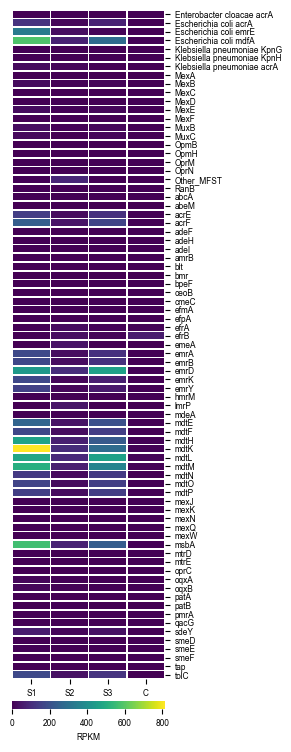

In [56]:
#multidrug heatmap
plt.rcParams['font.size'] = 6
plt.rcParams['font.family'] = 'Arial'

#create figure, one ax
fig, ax = plt.subplots(figsize=(5*cm, 24*cm))
#plot heatmap
sns.heatmap(multidrug_values, cmap="viridis", linewidths=.5, ax=ax, yticklabels=True,
            cbar_kws={'label': 'RPKM', 'orientation': 'horizontal', 'pad': 0.03, 'fraction': 0.05})
ax.set_ylabel('') #hide y label
#move ylabels to right
ax.yaxis.tick_right()
#rotate ylabels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.savefig("multidrug.svg", dpi=600, format='svg', bbox_inches='tight')
plt.show()

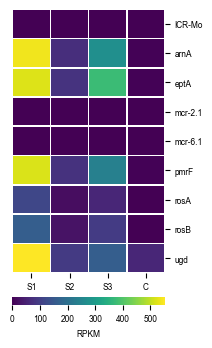

In [57]:
#polymyxin heatmap
#create figure, one ax
fig, ax = plt.subplots(figsize=(5*cm, 10*cm))
#plot heatmap
sns.heatmap(polymyxin_values, cmap="viridis", linewidths=.5, ax=ax, yticklabels=True,
            cbar_kws={'label': 'RPKM', 'orientation': 'horizontal', 'pad': 0.08, 'fraction': 0.05})
ax.set_ylabel('') #hide y label
#move ylabels to right
ax.yaxis.tick_right()
#rotate ylabels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.savefig("polymyxin.svg", dpi=600, format='svg', bbox_inches='tight')
plt.show()